In [1]:
# Chapter 12 (Natural Language Processing)

In [33]:
import textblob
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords

In [40]:
stops = stopwords.words('english')
print(stops)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [52]:
text = 'Today is a beautiful day. Tommorrow is likely to be a good day.'
blob = TextBlob(text)

In [53]:
blob.words

WordList(['Today', 'is', 'a', 'beautiful', 'day', 'Tommorrow', 'is', 'likely', 'to', 'be', 'a', 'good', 'day'])

In [54]:
flow = [word for word in blob.words if word not in stops]
print(flow)

['Today', 'beautiful', 'day', 'Tommorrow', 'likely', 'good', 'day']


In [67]:
print(blob.ngrams(2))

[WordList(['Today', 'is']), WordList(['is', 'a']), WordList(['a', 'beautiful']), WordList(['beautiful', 'day']), WordList(['day', 'Tommorrow']), WordList(['Tommorrow', 'is']), WordList(['is', 'likely']), WordList(['likely', 'to']), WordList(['to', 'be']), WordList(['be', 'a']), WordList(['a', 'good']), WordList(['good', 'day'])]


In [114]:
# Word Frequencies

In [115]:
# Quantitative Analysis

In [57]:
from pathlib import Path

In [69]:
text = Path('./RomeoAndJuliet.txt').read_text(encoding='utf-8')
blob = TextBlob(text)

In [76]:
items = blob.word_counts.items()
items = [item for item in items if item[0] not in stops]
print(items)

[('tragedy', 1), ('romeo', 315), ('juliet', 190), ('william', 1), ('shakespeare', 1), ('contents', 1), ('prologue', 3), ('act', 13), ('scene', 51), ('public', 5), ('place', 16), ('ii', 12), ('street', 10), ('iii', 12), ('room', 8), ('capulet', 163), ('’', 867), ('house', 32), ('iv', 10), ('v', 10), ('hall', 8), ('chorus', 6), ('open', 9), ('adjoining', 2), ('garden', 8), ('friar', 105), ('lawrence', 82), ('cell', 22), ('vi', 2), ('gallery', 2), ('chamber', 13), ('overlooking', 2), ('bed', 25), ('mantua', 16), ('churchyard', 9), ('monument', 11), ('belonging', 3), ('capulets', 8), ('dramatis', 1), ('personæ', 1), ('escalus', 2), ('prince', 43), ('verona', 15), ('mercutio', 88), ('kinsman', 13), ('friend', 15), ('paris', 61), ('young', 24), ('nobleman', 2), ('page', 12), ('montague', 47), ('head', 16), ('veronese', 2), ('family', 2), ('feud', 2), ('lady', 117), ('wife', 20), ('son', 18), ('benvolio', 79), ('nephew', 3), ('abram', 7), ('servant', 31), ('balthasar', 19), ('montagues', 6), 

In [77]:
import pandas as pd

In [83]:
df = pd.DataFrame(items, columns=['word', 'frequency'])
df.sort_values(by = 'frequency', ascending=False)

,word,frequency
16,’,867
1,romeo,315
170,thou,278
2,juliet,190
221,thy,170
...,...,...
1801,sucking,1
1800,divers,1
1798,burying,1
1795,precious-juiced,1


In [89]:
from operator import itemgetter

In [99]:
sorted_items = sorted(items, key = itemgetter(1), reverse=True)
print(sorted_items[0 : 20])

[('’', 867), ('romeo', 315), ('thou', 278), ('juliet', 190), ('thy', 170), ('capulet', 163), ('nurse', 149), ('love', 148), ('thee', 138), ('lady', 117), ('shall', 110), ('friar', 105), ('come', 94), ('mercutio', 88), ('lawrence', 82), ('good', 80), ('benvolio', 79), ('tybalt', 79), ('enter', 75), ('go', 75)]


In [98]:
top20 = sorted_items[1 : 21]
print(top20)

[('romeo', 315), ('thou', 278), ('juliet', 190), ('thy', 170), ('capulet', 163), ('nurse', 149), ('love', 148), ('thee', 138), ('lady', 117), ('shall', 110), ('friar', 105), ('come', 94), ('mercutio', 88), ('lawrence', 82), ('good', 80), ('benvolio', 79), ('tybalt', 79), ('enter', 75), ('go', 75), ('night', 73)]


In [107]:
df = pd.DataFrame(top20, columns = ['word', 'frequency'])
df

,word,frequency
0,romeo,315
1,thou,278
2,juliet,190
3,thy,170
4,capulet,163
5,nurse,149
6,love,148
7,thee,138
8,lady,117
9,shall,110


<Axes: xlabel='word'>

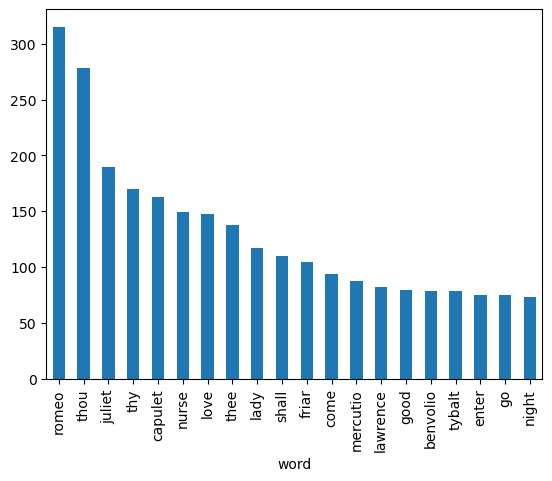

In [106]:
df.plot.bar(x='word', y='frequency', legend=False)

In [112]:
%matplotlib
import matplotlib.pyplot as plt

Using matplotlib backend: QtAgg


In [116]:
plt.show()

In [117]:
# Qualitative Analysis

In [118]:
conda install -c conda-forge wordcloud

In [119]:
import imageio

In [135]:
mask_image = imageio.v2.imread('mask.png')

In [136]:
from wordcloud import WordCloud

In [139]:
wc = WordCloud(colormap = 'prism', mask = mask_image, background_color = 'white')
wc = wc.generate(text)

In [140]:
wc.to_file('word_frequency.png')